In [9]:
from statsAnalysis.golf07.golfDynRespCompare import *

In [10]:
colsOfInterest = ['CO₂ in g/km (Average)(g/km)',
'Distance travelled with MIL/CEL lit(miles)', 'Engine Coolant Temperature(°C)', 'Engine Load(%)',
 'Engine RPM(rpm)', 'Fuel Trim Bank 1 Long Term(%)', 'Fuel Trim Bank 1 Short Term(%)', 
 'Intake Air Temperature(°C)', 'Intake Manifold Pressure(psi)', 'Kilometers Per Litre(Instant)(kpl)', 
 'Kilometers Per Litre(Long Term Average)(kpl)', 'Litres Per 100 Kilometer(Long Term Average)(l/100km)', 
 'Miles Per Gallon(Instant)(mpg)', 'Miles Per Gallon(Long Term Average)(mpg)', 
 'O2 Sensor1 Wide Range Current(mA)', 'O2 Bank 1 Sensor 1 Wide Range Equivalence Ratio(λ)', 
 'O2 Bank 1 Sensor 2 Voltage(V)', 'Speed (OBD)(mph)', 
 'Throttle Position(Manifold)(%)', 'Trip average KPL(kpl)', 'Trip average Litres/100 KM(l/100km)', 
 'Trip average MPG(mpg)', 'Turbo Boost & Vacuum Gauge(psi)']
for col in colsOfInterest:
    printDescribes(col, golfDfList0Rpms)

1
count             773
unique              2
top       129.0830841
freq              710
Name: CO₂ in g/km (Average)(g/km), dtype: object
2
count    8.900000e+01
mean     1.290831e+02
std      2.858274e-14
min      1.290831e+02
25%      1.290831e+02
50%      1.290831e+02
75%      1.290831e+02
max      1.290831e+02
Name: CO₂ in g/km (Average)(g/km), dtype: float64
1
count    773.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Distance travelled with MIL/CEL lit(miles), dtype: float64
2
count    89.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Distance travelled with MIL/CEL lit(miles), dtype: float64
1
count    773.000000
mean      79.337646
std       18.579087
min       17.000000
25%       85.000000
50%       85.000000
75%       85.000000
max       85.000000
Name: Engine Coolant Temperature(°C), dtype: float64
2
count    89.000000
mean     70.977528
std       0.

## RPM

In [11]:
printDescribes([boost, rpm, coolantTemp], statGolfs)


1
       Turbo Boost & Vacuum Gauge(psi)  Engine RPM(rpm)  \
count                       600.000000       600.000000   
mean                         -9.761707         0.794076   
std                           0.416498         0.159526   
min                         -10.348867         0.665250   
25%                          -9.913754         0.720000   
50%                          -9.913754         0.775750   
75%                          -9.768717         0.817250   
max                          -5.707660         1.973250   

       Engine Coolant Temperature(°C)  
count                      600.000000  
mean                        46.985000  
std                         16.795384  
min                         19.000000  
25%                         34.000000  
50%                         45.000000  
75%                         57.000000  
max                         82.000000  
2
       Turbo Boost & Vacuum Gauge(psi)  Engine RPM(rpm)  \
count                       889.000000       

Not as stable as it should be. Would take more examples before using.

## Turbo Boost

In [12]:
printDescribes([rpm, boost, coolantTemp], statGolfs)

1
       Engine RPM(rpm)  Turbo Boost & Vacuum Gauge(psi)  \
count       600.000000                       600.000000   
mean          0.794076                        -9.761707   
std           0.159526                         0.416498   
min           0.665250                       -10.348867   
25%           0.720000                        -9.913754   
50%           0.775750                        -9.913754   
75%           0.817250                        -9.768717   
max           1.973250                        -5.707660   

       Engine Coolant Temperature(°C)  
count                      600.000000  
mean                        46.985000  
std                         16.795384  
min                         19.000000  
25%                         34.000000  
50%                         45.000000  
75%                         57.000000  
max                         82.000000  
2
       Engine RPM(rpm)  Turbo Boost & Vacuum Gauge(psi)  \
count       889.000000                       

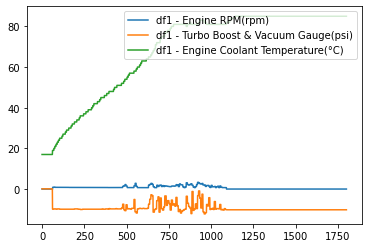

In [19]:
plotValsMultDfsHasValue([rpm, boost, coolantTemp], getDfsScaledRpm([golf2]))

Is too reliant on coolantTemp. Could still possibly be used though

## Throttle Position

In [22]:
printDescribes([throtPos, coolantTemp], golfDfList0Rpms) # seems good and stable while car not started
printDescribes([throtPos, coolantTemp], statGolfs) # is less reliable when started. Better off with the car not running
    

1
       Throttle Position(Manifold)(%)  Engine Coolant Temperature(°C)
count                      773.000000                      773.000000
mean                        16.471096                       79.337646
std                          0.092551                       18.579087
min                         14.117647                       17.000000
25%                         16.470589                       85.000000
50%                         16.470589                       85.000000
75%                         16.470589                       85.000000
max                         16.862745                       85.000000
2
       Throttle Position(Manifold)(%)  Engine Coolant Temperature(°C)
count                    8.900000e+01                       89.000000
mean                     1.647059e+01                       70.977528
std                      3.572843e-15                        0.212000
min                      1.647059e+01                       69.000000
25%             

Is somewhat consistent when engine is started, but is most consistent before engine has been started

## Investigating dynamic values for Golf
have two dfs (golf1 and golf2) looking at in 2 different ways. One is when the engine is not started, the other is when then engine is started but the vehicle is stationary.

* 1 - golf 1 not started
* 2 - golf 2 not started
* 3 - golf 1 started and stationary
* 4 - golf 2 started and stationary

In [ ]:
['CO₂ in g/km (Average)(g/km)', # not useful
'Distance travelled with MIL/CEL lit(miles)', # NU
 'Engine Coolant Temperature(°C)', #NU
  'Engine Load(%)', # the median seems to hover around the same value when started and stationary, risky to use though
 'Engine RPM(rpm)', # need to investigate more. Seems to take a very long time for the engine to heat up and for RPMs to settle for the Golf
  'Fuel Trim Bank 1 Long Term(%)', # seems like it had a good stable val before the engine was started of 1.5625
  # nevermind it is only stable after engine coolant reaches a certain temp
   'Fuel Trim Bank 1 Short Term(%)', #NU
 'Intake Air Temperature(°C)', #NU
 'Intake Manifold Pressure(psi)', # maybe useful when the engine has been started. Nvm doesnt seem great
 'Kilometers Per Litre(Instant)(kpl)', # NU
 'Kilometers Per Litre(Long Term Average)(kpl)', # seems useful, same with the other efficiency ones
 # of course will have to talk about how are profiling the driver here as much as the car
  'Litres Per 100 Kilometer(Long Term Average)(l/100km)', 
 'Miles Per Gallon(Instant)(mpg)', #NU
 'Miles Per Gallon(Long Term Average)(mpg)', 
 'O2 Sensor1 Wide Range Current(mA)', # NU
  'O2 Bank 1 Sensor 1 Wide Range Equivalence Ratio(λ)', #need to look up the meaning
  # seems to always stay around the same value, more stable before starting. Turns out it is a bit too dependant on the temp same as many others
 'O2 Bank 1 Sensor 2 Voltage(V)', # the mine is maybe stable at .46 before starting but maybe best to just avoid
  'Speed (OBD)(mph)', #  NU 
 'Throttle Position(Manifold)(%)', # looks v useful. Looks to be stable at diff values depending on off or running
 # seems good and stable while car not started
 # is less reliable when started. Better off with the car not running
  'Trip average KPL(kpl)', 'Trip average Litres/100 KM(l/100km)', # better off using the longer term ones
 'Trip average MPG(mpg)', 'Turbo Boost & Vacuum Gauge(psi)'] # spoke about, seems too dependant on the coolant, though less so than with the Accord

['CO₂ in g/km (Average)(g/km)',
 'Distance travelled with MIL/CEL lit(miles)',
 'Engine Coolant Temperature(°C)',
 'Engine Load(%)',
 'Engine RPM(rpm)',
 'Fuel Trim Bank 1 Long Term(%)',
 'Fuel Trim Bank 1 Short Term(%)',
 'Intake Air Temperature(°C)',
 'Intake Manifold Pressure(psi)',
 'Kilometers Per Litre(Instant)(kpl)',
 'Kilometers Per Litre(Long Term Average)(kpl)',
 'Litres Per 100 Kilometer(Long Term Average)(l/100km)',
 'Miles Per Gallon(Instant)(mpg)',
 'Miles Per Gallon(Long Term Average)(mpg)',
 'O2 Sensor1 Wide Range Current(mA)',
 'O2 Bank 1 Sensor 1 Wide Range Equivalence Ratio(λ)',
 'O2 Bank 1 Sensor 2 Voltage(V)',
 'Speed (OBD)(mph)',
 'Throttle Position(Manifold)(%)',
 'Trip average KPL(kpl)',
 'Trip average Litres/100 KM(l/100km)',
 'Trip average MPG(mpg)',
 'Turbo Boost & Vacuum Gauge(psi)']

## Summary
That is all the useful dynamic responses from the 07 Golf

* RPM
    * Not stable enough, perhaps take another sample
* MPG long term
    * Is useful 
    * keep in mind are profiling the diver as much as the vehicle with this however
    * though faults in a car will often effect the MPG
* Throttle Position
    * Most stable when engine not started
    * Could also take the value when the car is idling